# Beispiel 18.1: Vereinfachte Betrachtung von Reaktionen 2. Ordnung 

Bearbeitet von Franz Braun

Dieses Beispiel befindet sich im Lehrbuch auf den Seiten 273 - 274. Die Nummerierung
der verwendeten Gleichungen entspricht der Nummerierung im Lehrbuch. Das hier angewendete
Vorgehen entspricht dem im Lehrbuch vorgestellten Lösungsweg.

Zunächst werden die benötigten Pakete importiert.

In [51]:
### Import
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_bvp

Anschließend werden die dimensionslosen Materialbilanzen für die Reaktion 1. und 2. Ordnung (Gleichung 18.15a) in separaten Funktionen implementiert, obwohl beide Materialbilanzen identisch sind. Da die Kinetik sich in beiden Fällen der Reaktionsordnung jedoch unterscheidet, wurde der Übersichtlichkeit halber eine separate Implementierung gewählt. Außerdem werden die dazugehörigen Randbedingungen (Tabelle 18.1) definiert. 

In [52]:
def material_2(X,y):
    '''
    Dimensionslose Materialbilanz für die Reaktion 2.Ordnung (Gleichung 18.15a)
    y[0]       : Restanteil von A1
    y[1]       : Restanteil von A2
    y[2]       : Restanteil von A3
    y[3]       : erste Ableitung des Restanteils von A1 nach der dimensionslosen Ortskoordinate
    y[4]       : erste Ableitung des Restanteils von A2 nach der dimensionslosen Ortskoordinate
    y[5]       : erste Ableitung des Restanteils von A3 nach der dimensionslosen Ortskoordinate
    dy2dX2     : zweite Ableitung der Restanteile von nach der dimensionslosen Ortskoordinate (Vektor der Größe 3)
    nu         : Stöchiometrische Koeffizienten (Vektor der Größe 3)
    omega      : dimensionslose Reaktionsgeschwindigkeit
    X          : Ortskoordinate
    '''

    omega = omega_f_2(y[:3])
    
    dy2dX2 = np.empty_like(y[3:])
    
    dy2dX2[0] = - Ha**2 * nu[0] * omega
    dy2dX2[1] = - Ha**2 * nu[1] * omega
    dy2dX2[2] = - Ha**2 * nu[2] * omega
    

    return np.vstack((y[3:],dy2dX2))


def material_1(X,y):
    '''
    Dimensionslose Materialbilanz für die Reaktion 1.Ordnung (Gleichung 18.15a)
    y[0]       : Restanteil von A1
    y[1]       : Restanteil von A2
    y[2]       : Restanteil von A3
    y[3]       : erste Ableitung des Restanteils von A1 nach der dimensionslosen Ortskoordinate
    y[4]       : erste Ableitung des Restanteils von A2 nach der dimensionslosen Ortskoordinate
    y[5]       : erste Ableitung des Restanteils von A3 nach der dimensionslosen Ortskoordinate
    dy2dX2     : zweite Ableitung der Restanteile von nach der dimensionslosen Ortskoordinate (Vektor der Größe 3)
    nu         : Stöchiometrische Koeffizienten (Vektor der Größe 3)
    omega      : dimensionslose Reaktionsgeschwindigkeit
    X          : Ortskoordinate
    '''

    omega = omega_f_1(y[:3])
    
    dy2dX2 = np.empty_like(y[3:])
    
    dy2dX2[0] = - Ha**2 * nu[0] * omega
    dy2dX2[1] = - Ha**2 * nu[1] * omega
    dy2dX2[2] = - Ha**2 * nu[2] * omega
    

    return np.vstack((y[3:],dy2dX2))

def bc_material(y0,y1):
    '''
    Randbedingungen der Materialbilanz (Tabelle 18.1)
    y0 : Randbedingungen bei X = 0
    y1 : Randbedingungen bei X = 1
    '''
    BC = np.empty(nu.size *2)
    # A1
    BC[0] = y0[0] - f_e[0] # f_1,L = 1
    BC[1] = y1[0]          # f_1,L = 0 
    # A2
    BC[2] = y0[4]          # df_2,L/dX = 0
    BC[3] = y1[1] - f_e[1] # f_2,L = f_2,L,b
    # A3
    BC[4] = y0[5]          # df_3,L/dX = 0
    BC[5] = y1[2] - f_e[2] # f_3,L = f_3,L,b
    
    return BC



Danach werden die stöchiometrischen Koeffizienten gemäß der Reaktionsgleichung (18.1) parametriert. Die dimensionslose Reaktionsgeschwindigkeit ergibt sich aus Gleichung (18.12e) für eine einzelne Reaktion 2. Ordnung wie folgt:

\begin{align*}
    \omega_\mathrm{L} &= \frac{r_\mathrm{1,L}}{r_\mathrm{1,e}} = \frac{k_1\,c_\mathrm{1,L}}{k_1\,c_\mathrm{1,e,L}}\frac{c_\mathrm{2,L}}{c_\mathrm{2,e,L}}
\end{align*}

Durch Umformung erhalt man einen Ausdruck auf Basis des Restanteils und des Einsatzverhältnisses.

\begin{align*}
    \omega_\mathrm{L}
    &=\frac{c_\mathrm{1,L}}{c_\mathrm{1,e,L}}\frac{c_\mathrm{2,L}}{c_\mathrm{2,e,L}}\frac{c_\mathrm{1,e,L}}{c_\mathrm{1,e,L}}  
    = \frac{c_\mathrm{1,L}}{c_\mathrm{1,e,L}}\frac{c_\mathrm{2,L}}{c_\mathrm{1,e,L}}\frac{c_\mathrm{1,e,L}}{c_\mathrm{2,e,L}}\\
    &=f_1\,f_2\,\kappa_{2}^{-1}
\end{align*}

Wird die Reaktion 2. Ordnung mit einer Reaktion 1. Ordnung approximiert, wie im Beispiel beschrieben, folgt:   

\begin{align*}
    \omega_\mathrm{L} &= 
    \frac{r_\mathrm{1,eff,L}}{r_\mathrm{1,eff,e}} = \frac{k_\mathrm{1,eff}}{k_\mathrm{1,eff}}\frac{c_\mathrm{1,L}}{c_\mathrm{1,e,L}} \\
   &=f_1
    
\end{align*}


Diese Gleichungen für die dimensionslose Reaktionsgeschwindigkeiten 1. und 2. Ordnung werden jeweils in eine Funktion implementiert.

In [53]:
nu      = np.array((-1,-1,1)) # Stöchiometrische Koeffizienten für A1, A2, A3 
f_e     = np.array((1,2,0))   # Restanteile am Eintritt
kappa_2 = 1                   # Einsatzverhältnis

def omega_f_2(f):
    '''
    Dimensionslose Reaktionsgeschwindigkeit für eine Reaktion 2. Ordnung
    f : Vektor der Restanteile 
    '''
    return f[0] * f[1] / kappa_2

def omega_f_1(f):
    '''
    Dimensionslose Reaktionsgeschwindigkeit für eine Reaktion 1. Ordnung
    f : Vektor der Restanteile 
    '''
    return  f[0] 

Da der Einfluss der Hatta-Zahlen $(Ha)$ betrachtet werden soll, erfolgt die Variation von $Ha$ in einer For-Schleife. Die Profile der Restanteile werden durch den Aufruf eines Solvers für Randwertprobleme (solve_bvp) auf Grundlage der Materialbilanzen und der Randbedingungen berechnet.

In [54]:
Ha_vec   = np.array((0.3,2,5))   # Vektor mit Hatta - Zahlen für Beispiel 18.1

Lösungen_2 = []                    # Leere Liste zum Speichern der Lösungen für die Reaktion 2. Ordnung
Lösungen_1 = []                    # Leere Liste zum Speichern der Lösungen für die Reaktion 1. Ordnung
N          = 1001                  # Diskretisierung
X          = np.linspace(0,1,N)    # Diskretisierung der Ortskoordinate
init       = np.zeros((6,N))       # Startwerte für die Iterationen des Solvers

for HaHa in Ha_vec:
    Ha = HaHa
    sol_2 = solve_bvp(material_2, bc_material, X,init , max_nodes = 1e10)
    sol_1 = solve_bvp(material_1, bc_material, X,init , max_nodes = 1e10)
    if sol_2.success == False:
        print(sol_2)
    if sol_1.success == False:
        print(sol_1)
    Lösungen_2.append(sol_2)
    Lösungen_1.append(sol_1)

Lösungen_2 = np.array((Lösungen_2))
Lösungen_1 = np.array((Lösungen_1))

Abschließend werden die Ergebnisse grafisch veranschaulicht.

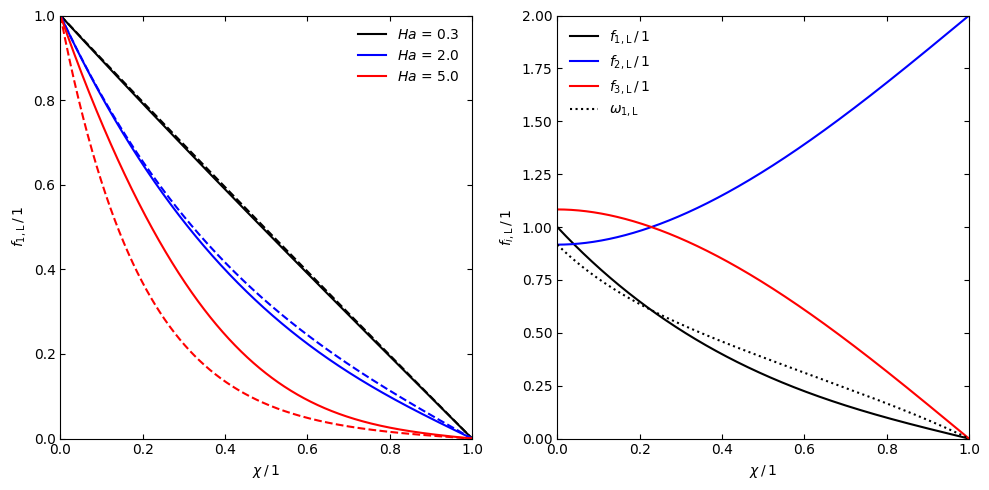

In [55]:
colors = ['black','blue','red']
labels = [r'$f_{1,\mathrm{L}}\,/\,1$',r'$f_{2,\mathrm{L}}\,/\,1$',r'$f_{3,\mathrm{L}}\,/\,1$']

fig, ax = plt.subplots(1, 2, figsize = (10, 5))
for Lösung_2,Lösung_1, Ha, color in zip(Lösungen_2,Lösungen_1,Ha_vec,colors):
    ax[0].plot(Lösung_2.x, Lösung_2.y[0], label ='$Ha$ = ' + str(Ha), color = color)
    ax[0].plot(Lösung_1.x, Lösung_1.y[0], color = color, linestyle = '--')
ax[0].set_xlim(0,1)
ax[0].set_ylim(0,1)
ax[0].tick_params(axis="y",direction="in", right = True)
ax[0].tick_params(axis="x",direction="in", top = True)
ax[0].set_ylabel(r'$f_{1,\mathrm{L}}\,/\,1$')
ax[0].set_xlabel(r'$\chi \,/\,1$')
ax[0].legend(frameon=False)


for f_i, label, color in zip(Lösungen_2[1].y,labels,colors):
    ax[1].plot(Lösungen_2[1].x, f_i, label = label, color = color)
ax[1].plot(Lösungen_2[1].x, omega_f_2(Lösungen_2[1].y), label = r'$\omega_{1,\mathrm{L}}$', color = 'black', linestyle =':')   
ax[1].set_ylabel(r'$f_{i,\mathrm{L}}\,/\,1$')
ax[1].set_xlabel(r'$\chi \,/\,1$')
ax[1].set_xlim(0,1)
ax[1].set_ylim(0,2)
ax[1].tick_params(axis="y",direction="in", right = True)
ax[1].tick_params(axis="x",direction="in", top = True)
ax[1].legend(frameon=False)
plt.tight_layout()
plt.show()

Für das Beispiel 18.3 werden zusätzlich größere $Ha$ betrachtet. Für die Berechnung wird die Reaktionsgeschwindigkeit einer Reaktion 2. Ordung verwendet. 

In [56]:
Ha_vec_3   = np.array((2,5,10,20,100,1000))   # Vektor mit Hatta - Zahlen für Beispiel 18.3

Lösungen_3 = []                               # Leere Liste zum Speichern der Lösungen für die Reaktion 2. Ordnung
N          = 101                              # Diskretisierung
X          = np.linspace(0,1,N)               # Diskretisierung der Ortskoordinate
init_f     = np.ones((3,N))                   # Startwerte für Restanteile
init_df    = np.ones((3,N))*1e-5              # Startwerte für die Ableitungen der Restanteile
init       = np.vstack((init_f,init_df))      # Zusammengefügte Startwerte für die Iterationen des Solvers

for HaHa in Ha_vec_3:
    Ha = HaHa
    sol_3 = solve_bvp(material_2, bc_material, X,init , max_nodes = 1e10, tol = 1e-10)
    if sol_3.success == False:
        print(sol_3)
    Lösungen_3.append(sol_3)

Lösungen_3 = np.array((Lösungen_3))

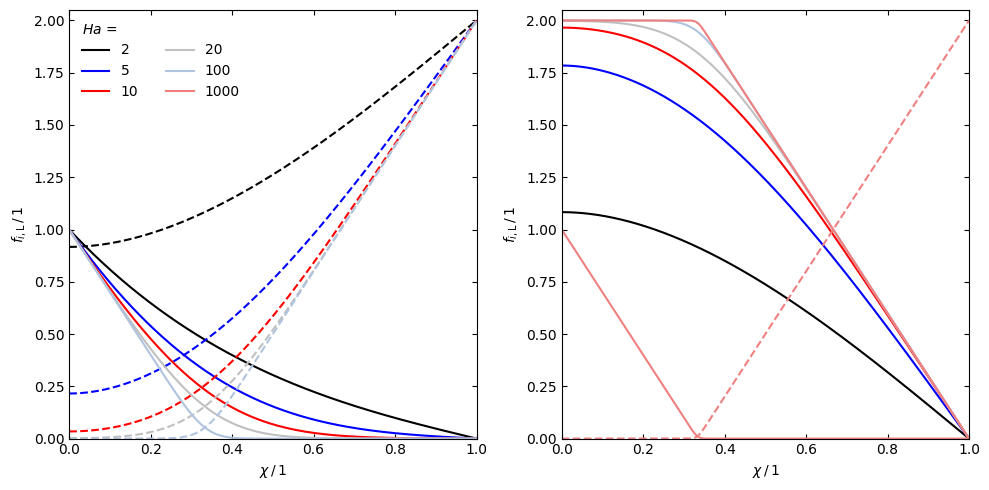

In [57]:
colors = ['black','blue','red','silver','lightsteelblue','lightcoral']

fig, ax = plt.subplots(1, 2, figsize = (10, 5))
for Lösung_3, Ha, color in zip(Lösungen_3[:-1],Ha_vec_3[:-1],colors[:-1]):
    ax[0].plot(Lösung_3.x, Lösung_3.y[0], label = str(Ha), color = color)
    ax[0].plot(Lösung_3.x, Lösung_3.y[1], color = color, linestyle = '--')
    ax[1].plot(Lösung_3.x, Lösung_3.y[2], color = color)

ax[0].plot([],[],label = str(Ha_vec_3[-1]), color = colors[-1])
ax[1].plot(Lösungen_3[-1].x, Lösungen_3[-1].y[0], label = str(Ha), color = colors[-1])
ax[1].plot(Lösungen_3[-1].x, Lösungen_3[-1].y[1], color = colors[-1], linestyle = '--')
ax[1].plot(Lösungen_3[-1].x, Lösungen_3[-1].y[2], color = colors[-1])

ax[0].set_xlim(0,1)
ax[0].set_ylim(0,2.05)
ax[0].tick_params(axis="y",direction="in", right = True)
ax[0].tick_params(axis="x",direction="in", top = True)
ax[0].set_ylabel(r'$f_{i,\mathrm{L}}\,/\,1$')
ax[0].set_xlabel(r'$\chi \,/\,1$')
ax[0].legend(title = '$Ha$ =',frameon = False, alignment = 'left',ncol=2)


ax[1].set_ylabel(r'$f_{i,\mathrm{L}}\,/\,1$')
ax[1].set_xlabel(r'$\chi \,/\,1$')
ax[1].set_xlim(0,1)
ax[1].set_ylim(0,2.05)
ax[1].tick_params(axis="y",direction="in", right = True)
ax[1].tick_params(axis="x",direction="in", top = True)
plt.tight_layout()
plt.show()